# Chapter 3 Exercises

# 1. 
The small p values for TV and radio correspond to the low probability of observing the t statistics we see by chance. Hence TV and radio *do* have a relationship with the response, sales. However, newspaper’s large p-value corresponds to an unlikely relationship with sales or a very weak one.
# 2. 
The difference between the KNN classifier and KNN regression methods is KNN classifiers results in a qualitative classification of $X$ into a specific group while KNN regression methods are used to non parametrically fit many valued observations ($f(x)$).
# 3. 
* a. i. False. ii. False. iii. False. iv. iv.True. $X_5$ dominates for high enough GPA, thus meaning on average males make more for high enough GPA.
 * b. $Y=50+20\cdot(4.0)+0.07\cdot(110)+35+0.01(4.0\cdot110)-10(4.0) = 137.1$ thousand $$
 * c. False. There can be an interaction effect; it’s just not a strong effect. Need to look at the associated p-value to determine whether the GPA*IQ interaction term is significant or not.
 
# 4. 
### a.
The cubic regression may give the tighter fit on the training data (i.e. lower RSS) but there’s no telling whether this is over fitting to the data or not. This scenario is more likely with a larger epsilon. 
### b. 
The linear regression will certainly give a better fit to test data than the cubic regression as it expects data pulled from a linear relation while the cubic regression will not only expect a different relation but will also have the possibility of being incorrectly fit to the noise in the training set.
### c.
In most cases one would expect the cubic regression to fare better as it has a more flexible fit; however, if the actual relation is linear than one might expect a better fit from the linear.
### d. 
Not clear.

# 5. 

# 6. 

# 7. 

# 8. 
This question involves the use of simple linear regression on the Auto data set.

### a. 
Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.

In [1]:
library(MASS)
library(ISLR)
attach(Auto)

In [2]:
lm.fit=lm(mpg~horsepower)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictor and the response?

Yes, there is a relationship between the predictor and the response as determined by testing the null hypothesis of all regression coefficients to zero. Since the F-statistic is much larger than 1 and has a correspondingly small p-value we can confirm the likelihood that the null hypothesis is false and that there is a statistically significant relationship between mpg and horsepower.

ii. How strong is the relationship between the predictor and the response?

To calculate the residual error with respect to the response we take the mean of mpg, 23.446, and the RSE of the fit, 4.906 which indicates a $4.906/23.446 *100 = 20.92\%$ percentage error. The $R^2=0.6059$ indicates that $60.59\%$ of the variance of mpg is explained by horsepower.

iii. Is the relationship between the predictor and the response positive or negative?

Looking at the sign of the regression coefficient of horsepower,we see that the relationship between mpg and horsepower is negative.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [3]:
mean_mpg = 39.935861 - 0.157845*98
mean_mpg
predict(lm.fit, data.frame(horsepower=c(98)), interval="confidence")
predict(lm.fit, data.frame(horsepower=c(98)), interval="prediction")

[1] 24.46705

,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.80940,34.12476


Reminder: What are confidence and prediction intervals?

We use a confidence interval to quantify the uncertainty surrounding the average sales over a large number of cities. For example, given that $\$100,000$ is spent on TV advertising and $\$20,000$ is spent on radio advertising in each city, the $95 \%$ confidence interval is $[10,985, 11,528]$. We interpret this to mean that $95 \%$ of intervals of this form will contain the true value of $f(X)$ On the other hand, a prediction interval can be used to quantify the uncertainty surrounding sales for a particular city. Given that $\$100,000$ is spent on TV advertising and $\$20,000$ is spent on radio advertising in that city the $95 \%$ prediction interval is $[7,930, 14,580]$. We interpret this to mean that $95 \%$ of intervals of this form will contain the true value of Y for this city. 

### b. 
Plot the response and the predictor. Use the abline() function to display the least squares regression line.

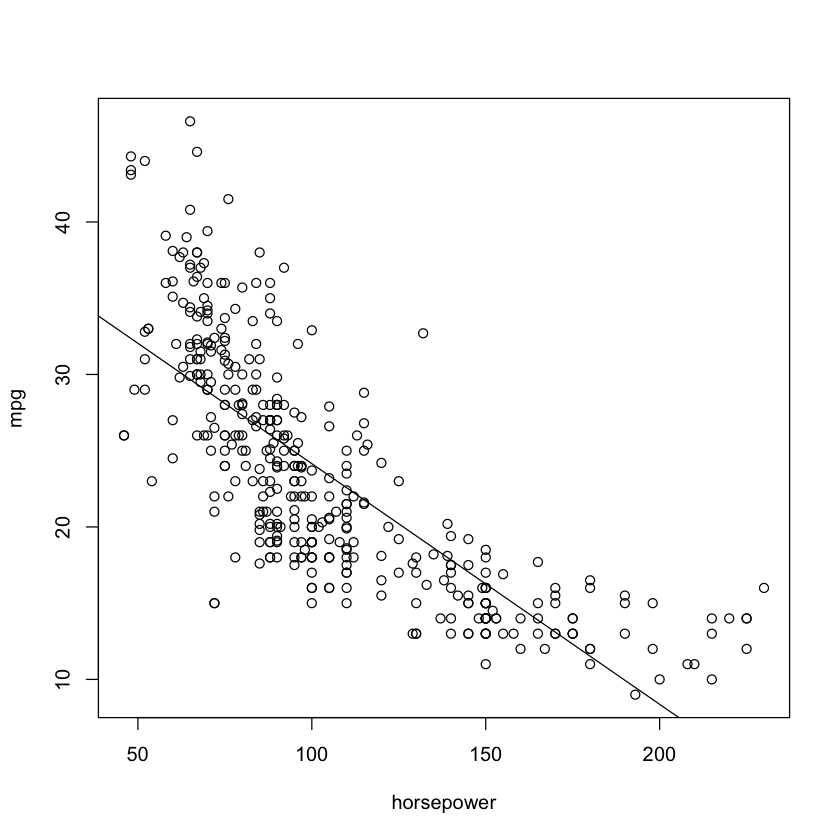

In [5]:
plot(horsepower,mpg)
abline(lm.fit)

### c. 
Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

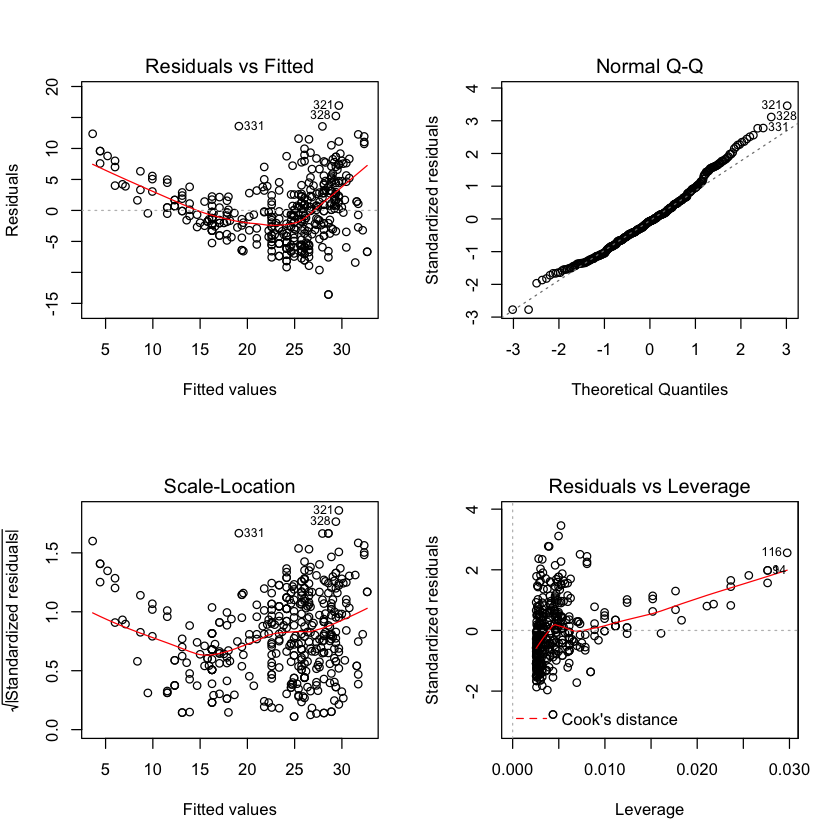

In [8]:
par(mfrow=c(2,2))
plot(lm.fit)

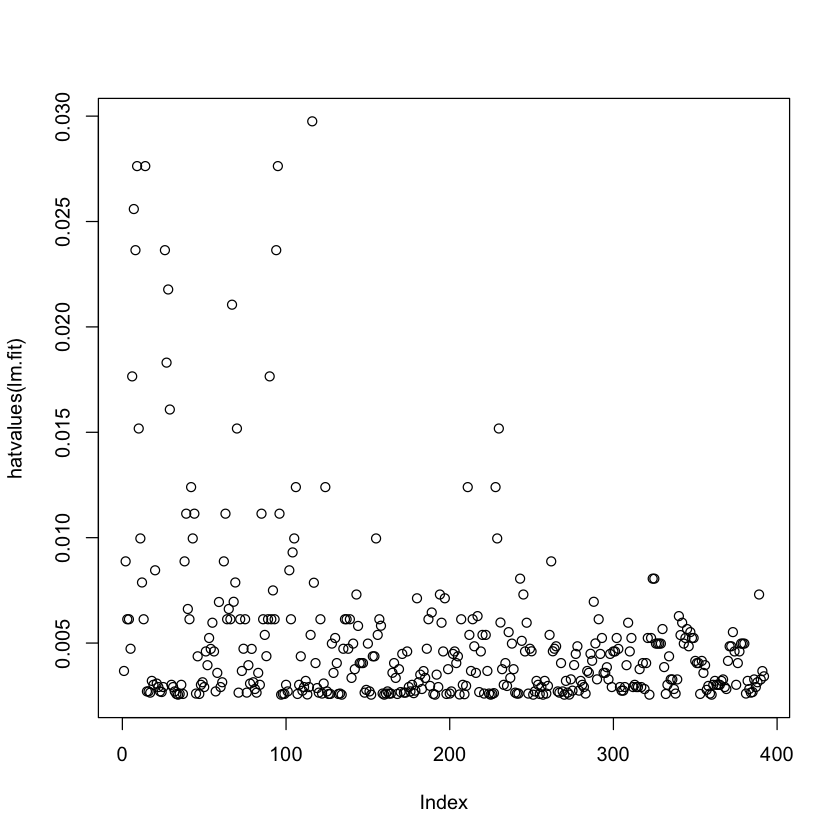

In [10]:
plot(hatvalues (lm.fit))

Plotting the residuals indicates that mpg most likely has a non-linear relationship with horsepower. It does not appear that there are any high-leverage (unusual value of x) points. 

# 9.
This question involves the use of multiple linear regression on the Auto data set.
### a.
Produce a scatterplot matrix which includes all of the variables in the data set.

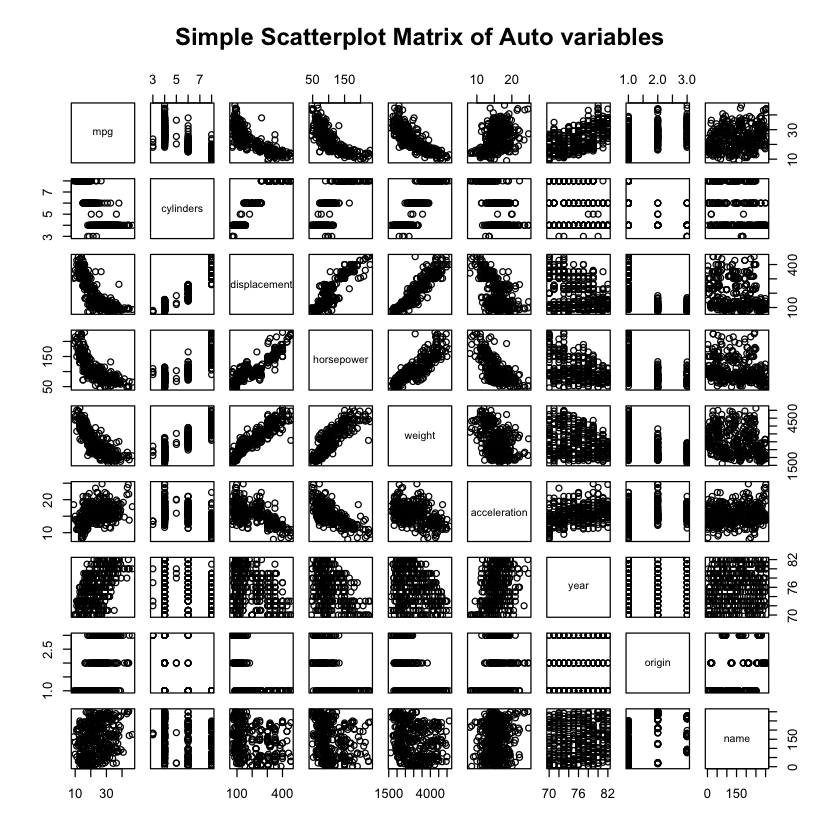

In [12]:
pairs(Auto, main="Simple Scatterplot Matrix of Auto variables")

### b.
Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [2]:
Autocor = cor(subset(Auto,select=-c(name)))
Autocor

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


### c.
Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

In [3]:
lm.fit2=lm(mpg~.-name,data = Auto)
summary(lm.fit2)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictors and the response?

Yes, there is a relationship between the predictor and the response as determined by testing the null hypothesis of all regression coefficients to zero. Since the F-statistic is much larger than 1 and has a correspondingly small p-value we can confirm the likelihood that the null hypothesis is false and that there is a statistically significant relationship between the variables and mpg.

ii. Which predictors appear to have a statistically significant relationship to the response?

Weight, year, origin and possibly displacement.

iii. What does the coefficient for the year variable suggest?

The regression coefficient for year, $0.7508$, suggests that for every one year, mpg increases by the coefficient. In other words, cars become more fuel efficient every year by almost 1 mpg / year.

### d.
Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

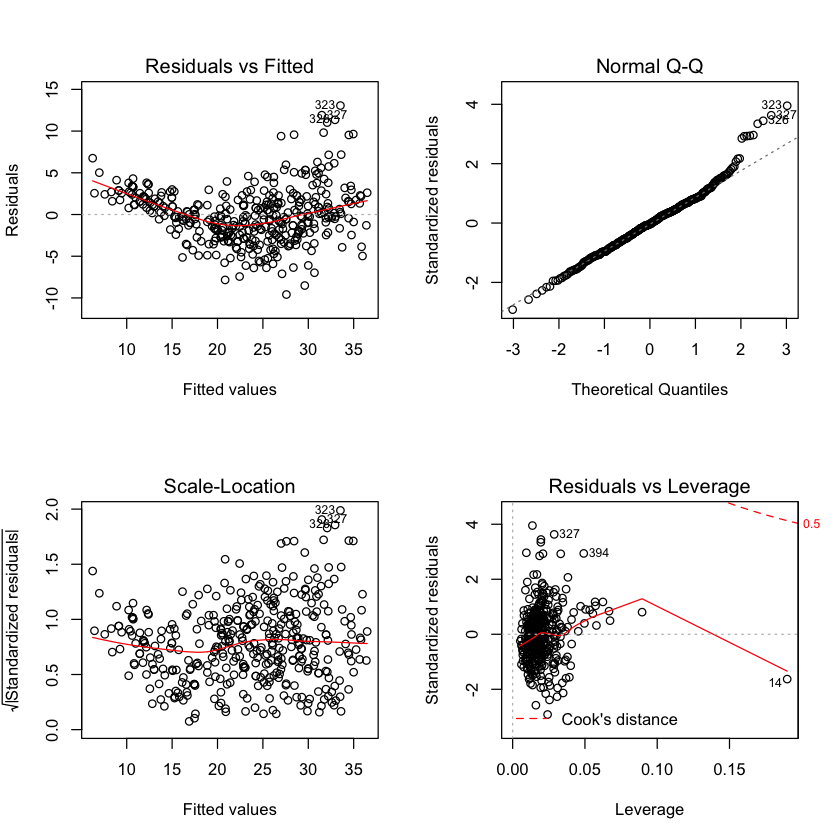

In [11]:
par(mfrow=c(2,2))
plot(lm.fit2)

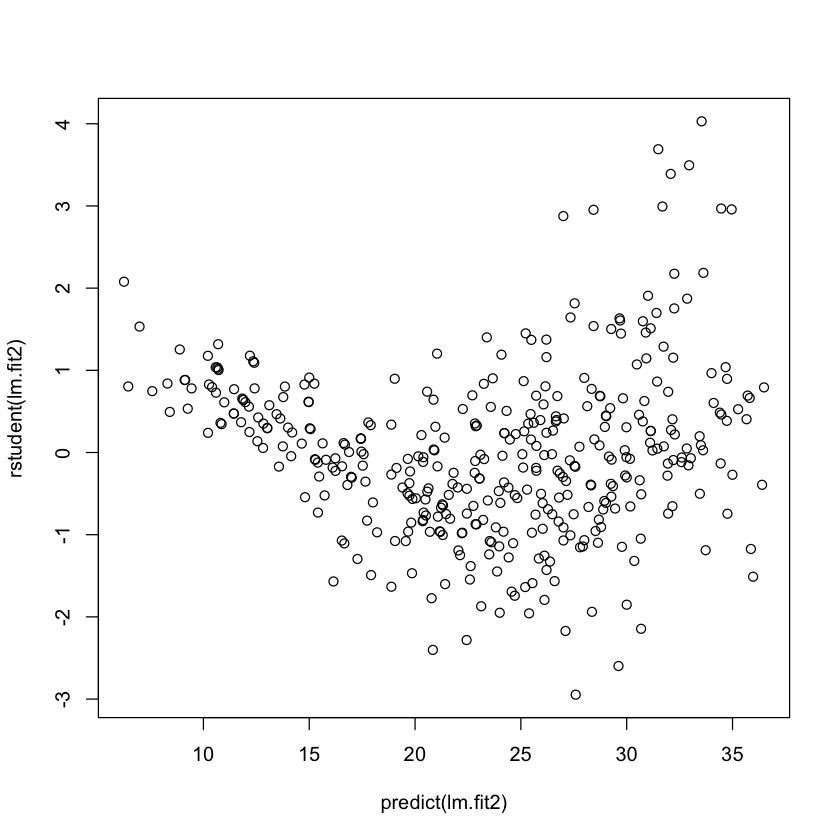

In [12]:
plot(predict(lm.fit2), rstudent(lm.fit2))

The residuals plot suggests that there could be a non-linearity to the data and that there could be interaction terms. There are a handful of points with slightly large ($>10$) residuals. Though it is difficult to identify whether this is a 'large' residual. To discern this we can plot the studentized residuals, computed by dividing each residual $e_i$ by its estimated standard error. Typical values are between -3 and 3. Since we have a couple points above the 3 threshold we can say that they are indeed outliers.  Point 14 has a high leverage but a low residual.

### e.
Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [6]:
a <- as.data.frame(as.table(Autocor))
a = subset(a, abs(Freq) > 0.9)
a
lm.fit3=lm(mpg~displacement*cylinders+weight*displacement,data = Auto)
summary(lm.fit3)

,Var1,Var2,Freq
1,mpg,mpg,1
10,cylinders,cylinders,1
11,displacement,cylinders,0.950823300827783
18,cylinders,displacement,0.950823300827783
19,displacement,displacement,1
21,weight,displacement,0.932994404089011
28,horsepower,horsepower,1
35,displacement,weight,0.932994404089011
37,weight,weight,1
46,acceleration,acceleration,1



Call:
lm(formula = mpg ~ displacement * cylinders + weight * displacement, 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
displacement:cylinders -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


Using the correlation matrix, I was able to find the pairs of variables that were correlated the most strongly. Having done this, I found that the displacement and weight appear to have a statistically significant interaction affect.

### f.
Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.


Call:
lm(formula = mpg ~ log(horsepower) + I(displacement^0.5) + log(weight), 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0750  -2.4785  -0.3462   2.0992  15.2919 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         166.3627    14.2417  11.681  < 2e-16 ***
log(horsepower)      -7.1167     1.3076  -5.442 9.33e-08 ***
I(displacement^0.5)  -0.1900     0.1697  -1.119    0.264    
log(weight)         -13.5327     2.1255  -6.367 5.46e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.992 on 388 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7384 
F-statistic: 368.9 on 3 and 388 DF,  p-value: < 2.2e-16


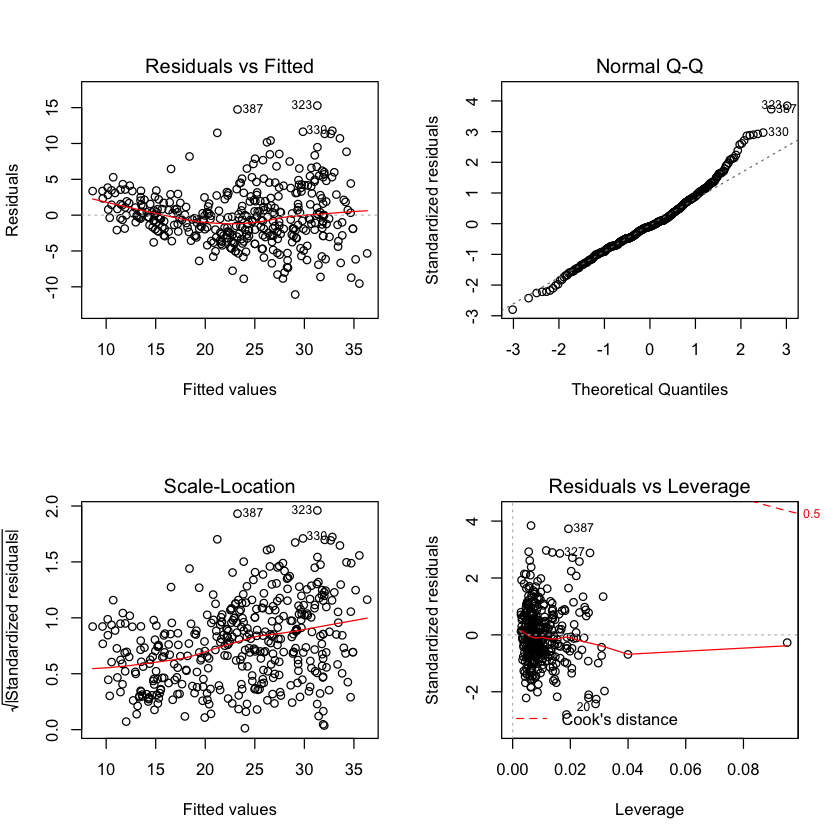

In [21]:
lm.fit4=lm(mpg~log(horsepower)+I(displacement^.5)+log(weight),data = Auto)
summary(lm.fit4)
par(mfrow = c(2, 2))
plot(lm.fit4)


Looking at the residuals vs fitted there seems to be a strong heteroscedasticity in the data. To alleviate this we can try transforming the response using a concave function!

# 10
This question should be answered using the Carseats data
### a.
Fit a multiple regression model to predict Sales using Price,Urban, and US.

In [35]:
attach(Carseats)
lm.fit5 = lm(Sales~Price+Urban+US)
summary(lm.fit5)

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




Call:
lm(formula = Sales ~ Price + Urban + US)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


### b.
Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Price has a negative correlation with Sales, higher price = less sales.
UrbanYes the linear regressions does not suggest that selling the car specifically in an urban area affects sales.
USYes If the store is in the US, it is associated with an increase in sales.

### c.
Write out the model in equation form, being careful to handle the qualitative variables properly.

$Sales = -0.054459*Price-0.021916*UrbanYes+1.200573*USYes$

### d.
For which of the predictors can you reject the null hypothesis $H_0:\beta_j=0$?

UrbanYes

### e.
On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [37]:
lm.fit6 = lm(Sales~Price+US)
summary(lm.fit6)


Call:
lm(formula = Sales ~ Price + US)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


### f.
How well do the models in (a) and (e) fit the data?

Not very well. They have low $R^2$ values. Adding UrbanYes does little to improve the fit of the model.

### g.
Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

### h.
Is there evidence of outliers or high leverage observations in the model from (e)?